# TS1 - Camila Belen Smith
## Primeros pasos en la simulacion

En este primer trabajo comenzaremos por diseñar un generador de señales que utilizaremos en las primeras simulaciones que hagamos. La primer tarea consistirá en programar una función que genere señales senoidales y que permita parametrizar:

- la amplitud máxima de la senoidal (volts)
- su valor medio (volts)
- la frecuencia (Hz)
- la fase (radianes)
- la cantidad de muestras digitalizada por el ADC (# muestras)
- la frecuencia de muestreo del ADC.


In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def generador_sen(vmax, dc, ff, ph, nn, fs):
    '''
    Esta funcion genera una señal senoidal.
    descripcion de los parametros:
    vmax:amplitud max de la senoidal [Volts]
    dc:valor medio [Volts]
    ff:frecuencia [Hz]
    ph:fase en [rad]
    nn:cantidad de muestras
    fs:frecuencia de muestreo [Hz]
    '''
    Ts= 1/fs
    tt=np.linspace(0,(nn-1)*Ts,nn)
    xx=vmax*np.sin(2*np.pi*ff*tt+ph)+dc
    return tt, xx

## Implementacion de la funcion:


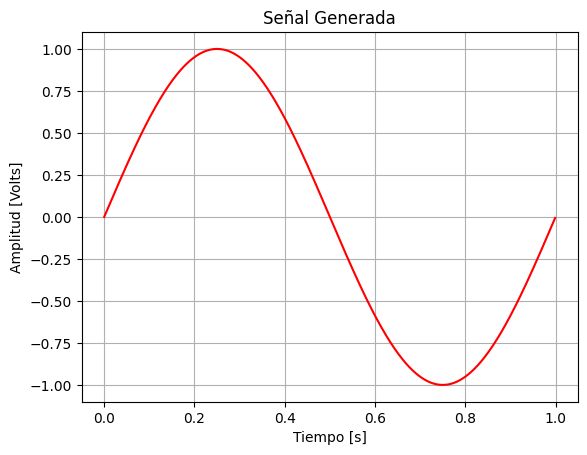

In [40]:
tt, yy = generador_sen(1, 0, 1, 0, 1000, 1000)
plt.figure(1)
plt.plot(tt, yy, color='red') 
plt.title('Señal Generada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.show()


## Bonus
Realizar los experimentos que se comentaron en clase. Siguiendo la notación de la función definida más arriba:
ff = 500 Hz
ff = 999 Hz
ff = 1001 Hz
ff = 2001 Hz

In [41]:
tt1, yy1 = generador_sen(1, 0, 500, 0, 1000, 1000)
tt2, yy2 = generador_sen(1, 0, 999, 0, 1000, 1000)
tt3, yy3 = generador_sen(1, 0, 1001, 0, 1000, 1000)
tt4, yy4 = generador_sen(1, 0, 2001, 0, 1000, 1000)

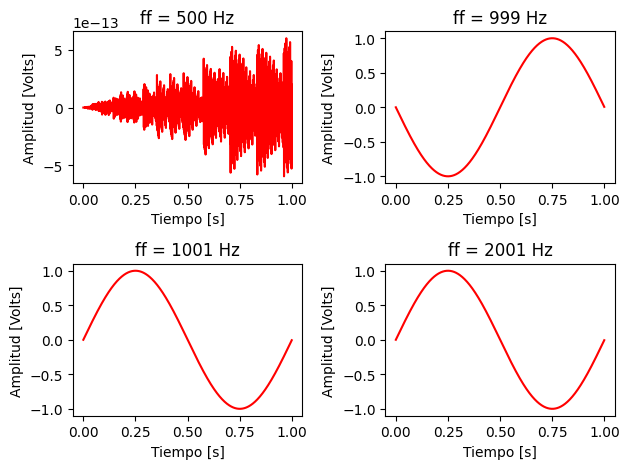

In [43]:
plt.figure(2)
plt.subplot(2,2,1)
plt.plot(tt1, yy1, color='red') 
plt.title('ff = 500 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(2,2,2)
plt.plot(tt2, yy2, color='red') 
plt.title('ff = 999 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(2,2,3)
plt.plot(tt3, yy3, color='red') 
plt.title('ff = 1001 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(2,2,4)
plt.plot(tt4, yy4, color='red') 
plt.title('ff = 2001 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.tight_layout()  
plt.show()

## Resumen de conceptos vistos en clase

- La $f_s$ se denomina frecuencia de muestreo o **frecuencia de Nyquist**. Se debe cumplir: $ f_s \geq 2 \cdot f_{\text{max}} $

- $\frac{f_s}{f_f}: $ cantidad de muestras por ciclo

- $N:$ muestras totales

- $T_s = \frac{1}{f_s} : $ es el **periodo de muestreo**, que es el intervalo de tiempo entre dos muestras sucesivas tomadas de la señal continua.

- $f_f  \cdot \frac{N}{f_s}:$ cantidad de **ciclos**

## Discusion
observacion: a lo largo del notebook hago referencia a $f_0$. aclaro que $f_0 = f_f$

A continuacion dejo breves analisis que hice sobre los resultados obtenidos del Bonus. 

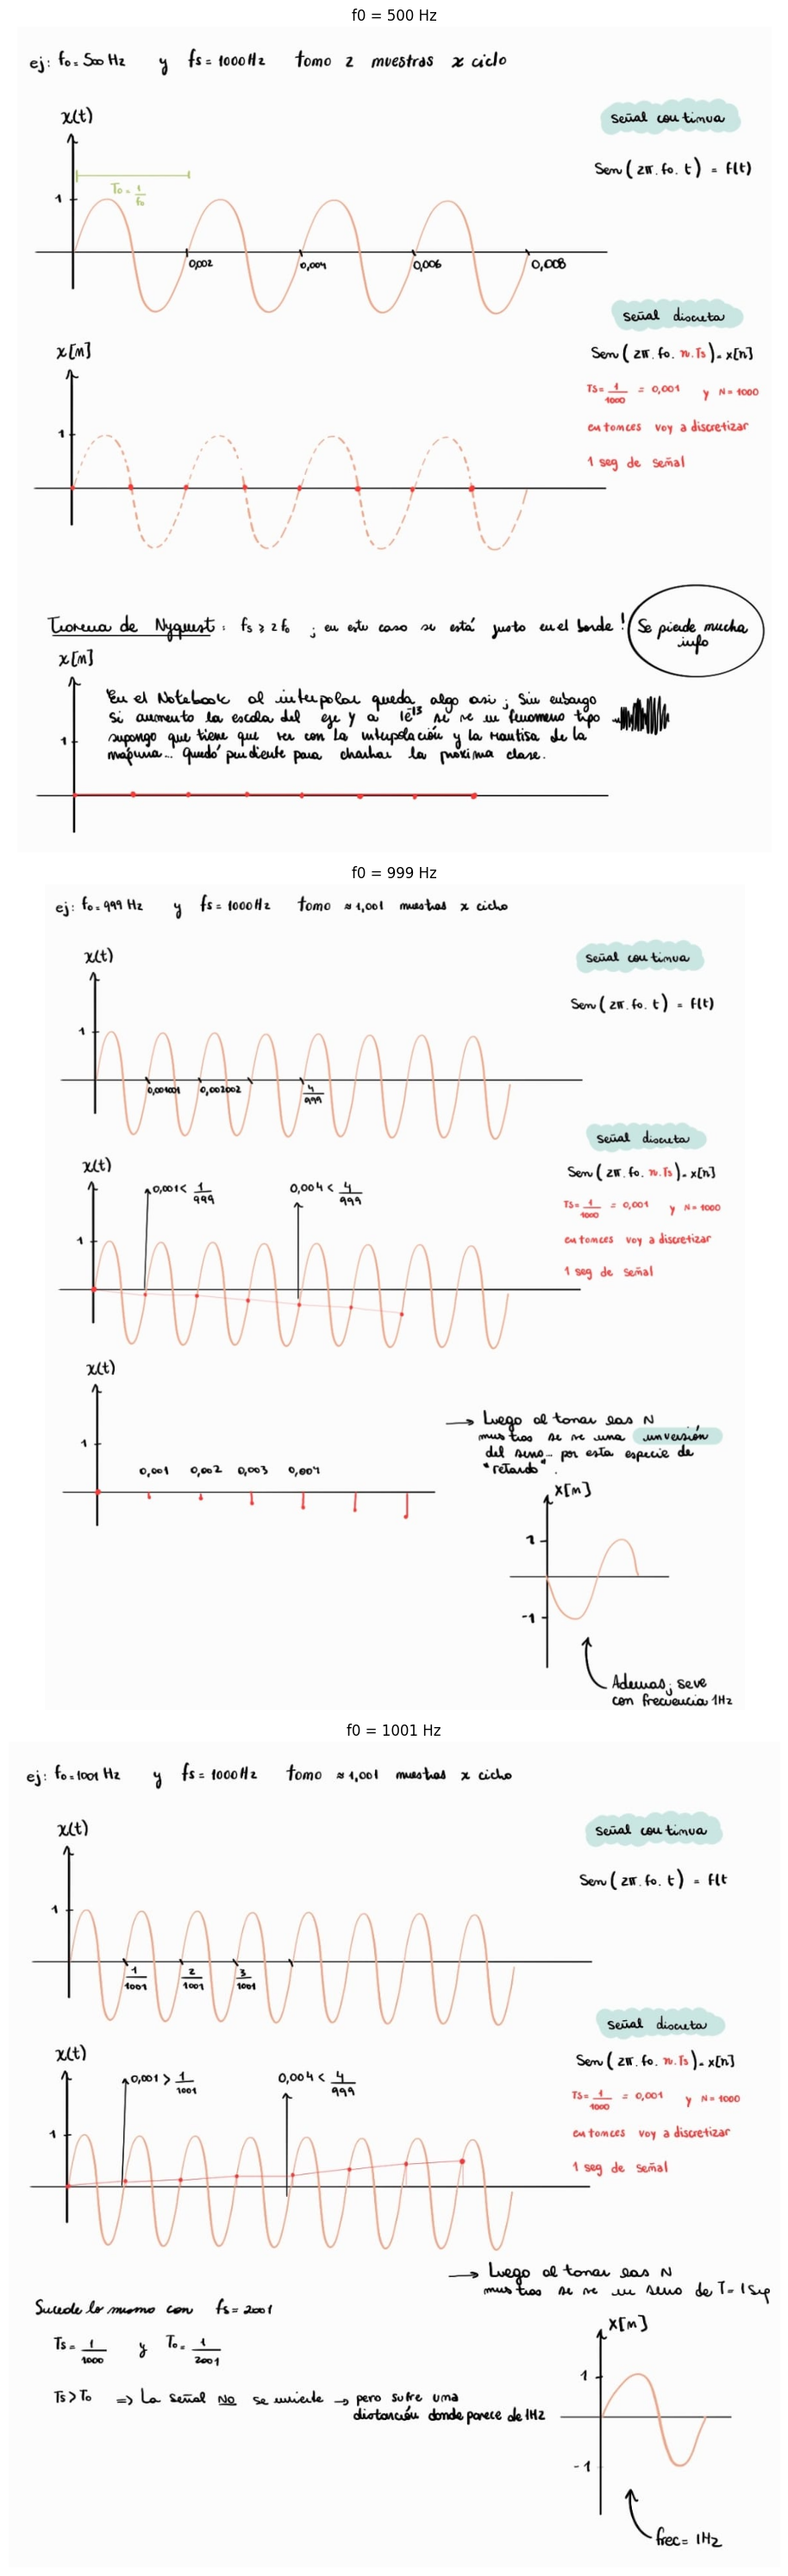

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rutas = [
    r"C:\Users\Notebook\Desktop\Smith APS\ff500.jpeg",
    r"C:\Users\Notebook\Desktop\Smith APS\ff999.jpeg",
    r"C:\Users\Notebook\Desktop\Smith APS\ff1001.jpeg"
]

titulos = ["f0 = 500 Hz", "f0 = 999 Hz", "f0 = 1001 Hz"]

fig, axes = plt.subplots(3, 1, figsize=(50, 30))

for ax, ruta, titulo in zip(axes, rutas, titulos):
    ax.imshow(mpimg.imread(ruta))
    ax.set_title(titulo)
    ax.axis("off")

plt.tight_layout()
plt.show()


La **frecuencia de aliasing** $f_a$ es la frecuencia aparente de la señal muestreada cuando $f_0$ excede el limite de Nyquist $f_s/2$. Se define como:

$$
f_a = \left| f_0 - k f_s \right|, \quad k \in \mathbb{Z}.
$$
$ k $ es un numero entero que representa cuantos ciclos de la frecuencia de muestreo $ f_s $ deben restarse de la frecuencia original $ f_0 $ para que la frecuencia observada se pliegue dentro del rango de frecuencias permitidas, $ [0, f_s/2] $

Después del muestreo, la frecuencia observada es $ f_a $, ya que las frecuencias mayores a $ f_s/2 $ se pliegan debido al aliasing.


$$
f_a = |f_0 - k f_s|, \quad \text{con } k \in \mathbb{Z}.
$$

Casos analizados:

$$
\begin{aligned}
f_0 = 500 \text{ Hz} &\Rightarrow f_a = 500 \text{ Hz} \quad (\text{caso límite}) \\
f_0 = 999 \text{ Hz} &\Rightarrow f_a = 1 \text{ Hz} \\
f_0 = 1001 \text{ Hz} &\Rightarrow f_a = 1 \text{ Hz} \\
f_0 = 2001 \text{ Hz} &\Rightarrow f_a = 1 \text{ Hz}
\end{aligned}
$$

Esto explicaria por que luego del muestreo las señales de $f_0 = 1001 $ se ven igual a $f_0 = 2001 $

## Bonus Bonus
Implementar una señal propia. Me gustaria por un lado experimentar un poco mas con la frecuencia de alaising. Voy a probar $f_0 = 1004$ y $f_0 = 2004 $

In [45]:
tt5, yy5 = generador_sen(1, 0, 1004, 0, 1000, 1000)
tt6, yy6 = generador_sen(1, 0, 2004, 0, 1000, 1000)

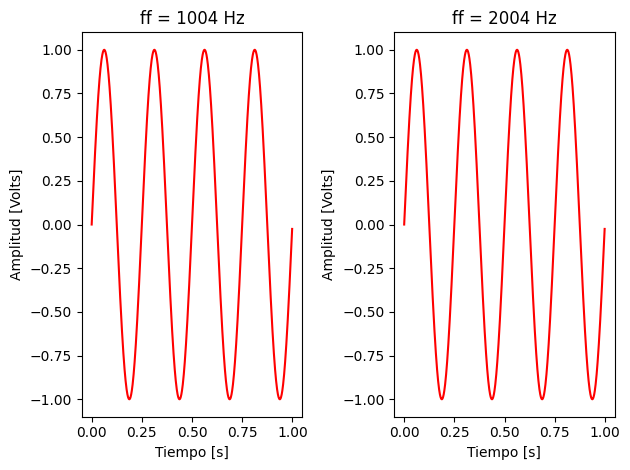

In [46]:
plt.figure(3)
plt.subplot(1,2,1)
plt.plot(tt5, yy5, color='red') 
plt.title('ff = 1004 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(1,2,2)
plt.plot(tt6, yy6, color='red') 
plt.title('ff = 2004 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.tight_layout()
plt.show()

Efectivamente se ven 4 ciclos Y ambas tienen el mismo comportamiento.

Por ultimo me gustaria probar con una $f_0 < f_s/2 = 500Hz $

In [47]:
tt7, yy7 = generador_sen(1, 0, 200, 0, 1000, 1000)
tt8, yy8 = generador_sen(1, 0, 400, 0, 1000, 1000)
                        

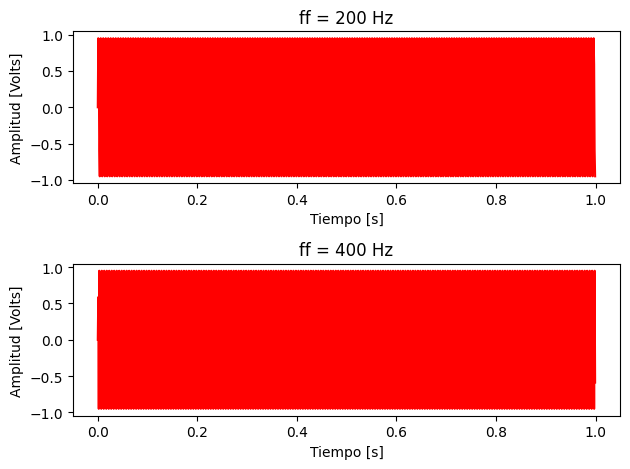

In [48]:
plt.figure(4)
plt.subplot(2,1,1)
plt.plot(tt7, yy7, color='red') 
plt.title('ff = 200 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(2,1,2)
plt.plot(tt8, yy8, color='red') 
plt.title('ff = 400 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.tight_layout()
plt.show()